In [1]:
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow_addons as tfa
import pandas as pd

# Load test dataset

X_test = np.load('./data/X_test.npy') 
y_test = np.load('./data/y_test.npy')  

# Load the custom loss function
custom_objects = {"Addons>TripletSemiHardLoss": tfa.losses.TripletSemiHardLoss}

# Load the model with the custom loss function
model = load_model('best_model.h5', custom_objects=custom_objects)


2024-08-22 07:54:37.570994: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/Caskroom/miniconda/base/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/Caskroom/miniconda/base/lib/python3.9/site-packages/keras/src/layers/core/lambda_layer.py:327: UserWarning: RamanNet_model is not loaded,

In [2]:
# Get the unique values in y_test
unique_values = np.unique(y_test)

# Print the unique values
print(f"Unique values in y_test: {unique_values}")

Unique values in y_test: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29.]


In [3]:
from RamanNet.source.codes.data_processing import segment_spectrum_batch

# Apply the same segmentation function to the test data
w_len = 10 
dw = 5
X_test_segmented = segment_spectrum_batch(X_test, w_len, dw)


In [4]:
# Predict the labels for the test set
y_pred = model.predict(X_test_segmented)
# if isinstance(y_pred, list):
#     y_pred = y_pred[1] 

# Convert predictions to class indices if they are one-hot encoded
y_pred_classes = np.argmax(y_pred[1], axis=1)


94/94 [==============================] - 6s 17ms/step


In [5]:
# Convert predictions to class indices
# y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes

array([ 0,  0,  0, ..., 14, 17, 14])

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_classes)

print(f"Accuracy on the test dataset: {accuracy * 100:.2f}%")

Accuracy on the test dataset: 45.30%


In [7]:
from sklearn.metrics import confusion_matrix
from config import STRAINS

conf_matrix = confusion_matrix(y_test, y_pred_classes)

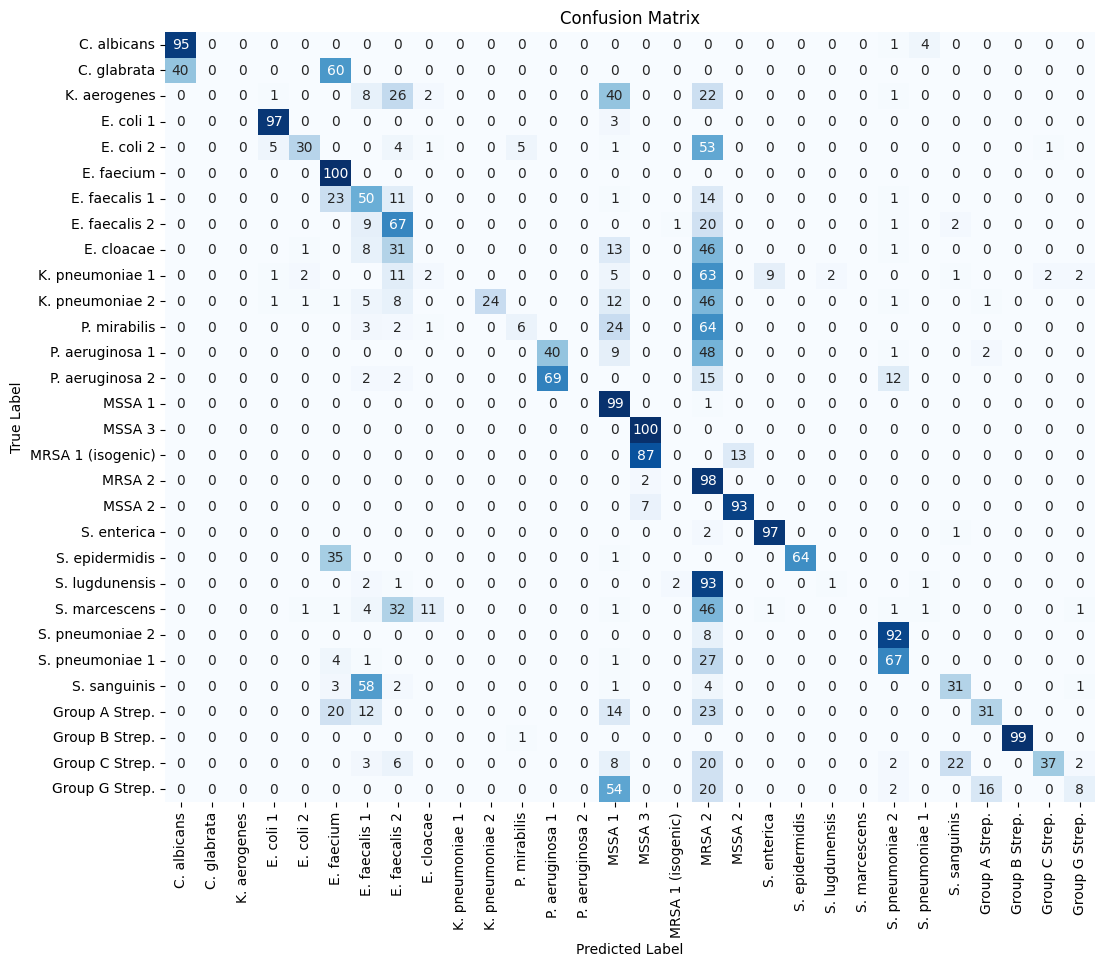

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=[STRAINS[i] for i in np.unique(y_test)], 
            yticklabels=[STRAINS[i] for i in np.unique(y_test)])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [26]:
unique_true_labels = np.unique(y_test)
print(f"Unique true labels: {unique_true_labels}")
# Check the unique classes in y_test
unique_classes_test = np.unique(y_test)
print(f"Unique classes in test data: {unique_classes_test}")


unique_classes_pred = np.unique(y_pred_classes)
print(f"Unique classes predicted: {unique_classes_pred}")

Unique true labels: [0. 2. 3. 5. 6.]
Unique classes in test data: [0. 2. 3. 5. 6.]
Unique classes predicted: [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24 25
 26 28 29]


In [27]:
# Assuming you have loaded your model
output_layer = model.layers[-1]  # Get the last layer (output layer)
num_classes_model = output_layer.output_shape[-1]  # Number of units in the output layer
print(f"The model can predict {num_classes_model} classes.")

The model can predict 30 classes.
